## Librerias

In [134]:
import opendatasets as od

import os, glob
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

import sweetviz as sv

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor

In [143]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,15))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [2]:
od.download("https://www.kaggle.com/competitions/datathon-entel-2022-reto2/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  richardramosflores


Your Kaggle Key:

  ································


100%|██████████| 18.6M/18.6M [00:00<00:00, 21.1MB/s]



Extracting archive .\datathon-entel-2022-reto2/datathon-entel-2022-reto2.zip to .\datathon-entel-2022-reto2


## Data

In [5]:
df_train = pd.read_csv('train.csv', sep=',')
df_test = pd.read_csv('test.csv', sep=',')
df_test_sample = pd.read_csv('test_sample.csv', sep=',')

In [12]:
print(df_train.shape)
df_train.head()

(47173, 55)


,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,SEMANA_01,SEMANA_02,SEMANA_03,SEMANA_04,SEMANA_05,SEMANA_06,SEMANA_07,SEMANA_08,SEMANA_09,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42,SEMANA_43,SEMANA_44,SEMANA_45,SEMANA_46,SEMANA_47,SEMANA_48,SEMANA_49,SEMANA_50
0,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,591c0a0133cb5fcd00af7bbf046f094256901239749fb7...,d2c888e1a77f2eb0732555cf018c3ca71bbcb32c73778c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5132f94c2aebce767bd61d9e8f0d4f681d0809ca90cd2c...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,85ac1d5351fa6c551dcaf4e9440939949f59fd6986c5ee...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,99af5fbe4f1ce1a2d5c05d8d50543bb993dd621f259c8e...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,ab82a1d82b6fbd27ffe90900dffa4e8018745ef082fdf2...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,4d9927f9d9ebe9b3742b20cf87b37b72c526f39d160289...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,285075a02b2679248a6b4636c3328bd3097626607c3e43...,8563abec343968034b0624650aed7254081e9e39e6b32e...,3f7d19feb71e55fc12b796a4cda0fbcec00511a039e758...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,2fc9e521d966b9a311c1d3fc70abafa98dd0f37a51c71a...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,df853f864c74fa85acd3a25cd0afed68f1f1d0ab249e17...,8563abec343968034b0624650aed7254081e9e39e6b32e...,dbd49c8cda7f4bbbfc2a8b337b5aa79dc8067b46ca1bf5...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,729be1d813198ffecf16f8c581e474cd58ee5aa7d11cdf...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df_train['Z_MARCA'].value_counts()

285075a02b2679248a6b4636c3328bd3097626607c3e43c0c5498258fbfa9f29    11888
9fc7c2306f5afb4bfe47feefbd193f245633febbb1817113fdf0a768172285b5    10631
5132f94c2aebce767bd61d9e8f0d4f681d0809ca90cd2cd09be494f221367bb5     5951
09c32757a9ca408c829114503523a5e6762dd1ba2b81067ad113837c1b30188b     5005
f223faa96f22916294922b171a2696d868fd1f9129302eb41a45b2a2ea2ebbfd     2844
df853f864c74fa85acd3a25cd0afed68f1f1d0ab249e17cdb25e77569ac595a2     2364
4b1acc0002585cda1245f0e07c6f58ff0e3b5a0e8d3187fa55d6e0ed43836c1d     1317
0855cd73c3a9dc2c31a7c4dcaecfd53282238c6a457a5c771cbee045c0d9a521     1225
53c759c773f2b832ddcc61534bdb919d44e03be212241e7dad49b286afa95340     1211
f41bcffa7463b16f9fea3293a550589718777902b4406c44e3150dad7c47bc3c      936
22ea092e7643557ea91b74dea27589acac28a04fce976c577c422cd3ee1c9dc2      864
c0dd56d5b73d72cbd9a3df3f70e0df98ce15417d0f8c3a678280beb763388a4f      724
1d45ae99abcc02002be90eabecf61d0ce0613d1de5f0c37ddd7bbbd7e8198cf5      637
c25b14ec280222786bd605c2e1d072a98fc186

In [14]:
df_train['Z_GAMA'].value_counts()

76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435892b1ab5713e57d470    20785
c4ebc6d4a5832cd9415f906ad03661110c705a72381c8b8b145761d02e2dd23a    12249
de88c121a82a06352bf1aaceba20578356408a334ba046a1084d4e50da923c5e     5576
8563abec343968034b0624650aed7254081e9e39e6b32ed45171fe31f6b7ee59     4453
f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b     3719
392323a5d3dcd1a8e9076af54e17b493ec11dceab6311d4bbab6044846cbbc3f      390
14a2db592fdae9640e32d665e0b0007aecdf0dcad631fed35a1e60a23bef683a        1
Name: Z_GAMA, dtype: int64

In [15]:
df_train['Z_MODELO'].value_counts()

b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101b4183bad845e55e08c    481
22e56e1cdf31281d499722a08d6bc23d10f6464b95d3f87a1632de534fd96815    479
5cee5be86c7a5465071316a4046784896a2939c525c348a24fbb0a4a9bf66487    479
7f3c23cabb48628e7e3f10234eeae4d1391505ec8fd1ada732624bdc617824f3    470
1d4e22c0856f42bc31146274374980ed03e6043e0b0a738de5011a8aff3a6e15    470
                                                                   ... 
bbc3d78ddab07690cac498e67cfd389c9b5ad0a029bbbb53bbdf5097fad5ceae      1
5d3674272fb8c90c7b18239d1d502b3f7d04a9a221022d258829d5c2ee4d9095      1
744850143a5e7e0e2ac0d8d62fa22a282cdf73e275f4e93b64a1ba11a06e7584      1
cbb6d6e49778618d7864a3a1ce17cf5633e1e14a2edb30b1ffec6af85e624b98      1
f0465138ce3c092d78c1e33657fe604564d40cdc8cb1969b81c1c031b58ced70      1
Name: Z_MODELO, Length: 318, dtype: int64

In [16]:
df_train['Z_DEPARTAMENTO'].value_counts()

d6c21b948958417ca98b682a573eb8aa1084b292d32f760f253ef53da13e5589    20475
110820d992b7649baca108cda049eff2fcf6804fd4c989a60e4128406d56b14c     3091
1fdd6772a58aa4eaf8c0055dfc2041085e5fc1e18aae6e9a2ad7db83f2355c5c     3046
1e4e6d80f0a8df2a8145eec37f6efe3d0f7909cf05a4da01ac9eb0886dff2122     2944
6375751784407a687081e34abb7c3e44a1d37b2d02ca31b97daf7131f0cc2ce8     2240
7556b904d2033b7ef193294c2223f4c162c9e6337fc1a37cb5a926c605ab639e     2058
5cd7368176e519fd5ccff4d61db909e869586b350e02f9ca13ff19de8e75c548     1771
654cc2e01783fa726c8b5743841202e3f95ae18fb4697f2a56f47cbe3d736434     1583
2170256e37ed495d1b4beceb046f9882b7d3628336fc04b9f6844822bc0f059a     1442
b15acf3f3f9ac39f827a8f5e4559b8663be3b48b283dcd373a3dec87a1b3c902     1211
28fa9368ededd016d5bd24b5d59fd461840dd1cc4fdaa8e62ed54bbdf51fa42e     1208
591c0a0133cb5fcd00af7bbf046f094256901239749fb779b3c5aba2cfa66af7      958
588ad85b346966aa3c52a8c80b4da62b8d8e39e6f37f38eb8a3907cba122bbca      944
6ff2a97bf9139cd1f16dfd60cb95f37b7a7490

In [17]:
df_train['Z_PUNTO_VENTA'].value_counts()

da45328ba820604eb99694768f2a430cd933d161601dcb8491b4a9b555232c59    248
e1f2d2708f545ddc1d7266ba0cc5ccc88147b77fdf3450e68a974e93018ecf60    222
fa11ef5fde36a7f4b7ee225f0fb5edee8c8ee4b9d20d14be433b42f1ecb178d1    195
81e83159fd0d3eee49cfc38870a6dd670a2192076c2e52dcddadc4f1f6927799    194
056401aa750b776c7601aaaa4fa5312196f1f34bc429c094763ffa46b6c2164c    193
                                                                   ... 
10a00fd565720ec9cca9a7bbea76b7852bb1ae95ca661daf2a1ee9ed15980680      5
467e7dbdb30d36788914ae936f3eb3798fa11ec5eb40776dfa6836cb388aee92      4
02b8ca33a9495853c0aca0184f9abcf8403023c6ad432c80f95d65cf631f27f2      3
96b556f78615fbc7476e199ffd4ff5764ea0805faf5087c945b7b3eeebc3bc71      3
ebd97eb30c9c0b4414600b10b467a44a9e29e93f093159f6cbee2d9898b03f4e      1
Name: Z_PUNTO_VENTA, Length: 486, dtype: int64

In [18]:
advert_report = sv.analyze(df_train)
advert_report.show_html("Reporting.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Reporting.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
print(df_test.shape)
df_test.head(5)

(47173, 15)


,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,SEMANA_51,SEMANA_52,SEMANA_53,SEMANA_54,SEMANA_55,SEMANA_56,SEMANA_57,SEMANA_58,SEMANA_59,SEMANA_60
0,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,591c0a0133cb5fcd00af7bbf046f094256901239749fb7...,d2c888e1a77f2eb0732555cf018c3ca71bbcb32c73778c...,99,99,99,99,99,99,99,99,99,99
1,5132f94c2aebce767bd61d9e8f0d4f681d0809ca90cd2c...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,85ac1d5351fa6c551dcaf4e9440939949f59fd6986c5ee...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,99af5fbe4f1ce1a2d5c05d8d50543bb993dd621f259c8e...,99,99,99,99,99,99,99,99,99,99
2,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,ab82a1d82b6fbd27ffe90900dffa4e8018745ef082fdf2...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,4d9927f9d9ebe9b3742b20cf87b37b72c526f39d160289...,99,99,99,99,99,99,99,99,99,99
3,285075a02b2679248a6b4636c3328bd3097626607c3e43...,8563abec343968034b0624650aed7254081e9e39e6b32e...,3f7d19feb71e55fc12b796a4cda0fbcec00511a039e758...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,2fc9e521d966b9a311c1d3fc70abafa98dd0f37a51c71a...,99,99,99,99,99,99,99,99,99,99
4,df853f864c74fa85acd3a25cd0afed68f1f1d0ab249e17...,8563abec343968034b0624650aed7254081e9e39e6b32e...,dbd49c8cda7f4bbbfc2a8b337b5aa79dc8067b46ca1bf5...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,729be1d813198ffecf16f8c581e474cd58ee5aa7d11cdf...,99,99,99,99,99,99,99,99,99,99


In [20]:
print(df_test_sample.shape)
df_test_sample.head(5)

(471730, 2)


,ID,Demanda
0,a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e...,99
1,a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e...,99
2,a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e...,99
3,a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e...,99
4,a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e...,99


In [21]:
df_test_sample.loc[0,'ID']

'a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e8db4a278f204f9b824|4d9927f9d9ebe9b3742b20cf87b37b72c526f39d160289e219cbc652f046fd93|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_51'

## Preprocesamiento de Data

In [32]:
df_train.head(1)

,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,SEMANA_01,SEMANA_02,SEMANA_03,SEMANA_04,SEMANA_05,SEMANA_06,SEMANA_07,SEMANA_08,SEMANA_09,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42,SEMANA_43,SEMANA_44,SEMANA_45,SEMANA_46,SEMANA_47,SEMANA_48,SEMANA_49,SEMANA_50
0,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,591c0a0133cb5fcd00af7bbf046f094256901239749fb7...,d2c888e1a77f2eb0732555cf018c3ca71bbcb32c73778c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
a = df_train.loc[0, 'SEMANA_01':'SEMANA_50']

In [36]:
a

SEMANA_01    0
SEMANA_02    0
SEMANA_03    0
SEMANA_04    0
SEMANA_05    0
SEMANA_06    0
SEMANA_07    0
SEMANA_08    0
SEMANA_09    1
SEMANA_10    0
SEMANA_11    0
SEMANA_12    0
SEMANA_13    0
SEMANA_14    0
SEMANA_15    0
SEMANA_16    0
SEMANA_17    0
SEMANA_18    0
SEMANA_19    0
SEMANA_20    0
SEMANA_21    0
SEMANA_22    0
SEMANA_23    0
SEMANA_24    0
SEMANA_25    0
SEMANA_26    0
SEMANA_27    0
SEMANA_28    0
SEMANA_29    0
SEMANA_30    0
SEMANA_31    0
SEMANA_32    0
SEMANA_33    0
SEMANA_34    0
SEMANA_35    0
SEMANA_36    0
SEMANA_37    0
SEMANA_38    0
SEMANA_39    0
SEMANA_40    0
SEMANA_41    0
SEMANA_42    0
SEMANA_43    0
SEMANA_44    0
SEMANA_45    0
SEMANA_46    0
SEMANA_47    0
SEMANA_48    0
SEMANA_49    0
SEMANA_50    0
Name: 0, dtype: object

In [86]:
df_train_semanas = df_train.iloc[:, 5:55]

In [132]:
it=1 # 0 a 9
df_train_semanas.iloc[:, 0+it:41+it].head(5)

,SEMANA_02,SEMANA_03,SEMANA_04,SEMANA_05,SEMANA_06,SEMANA_07,SEMANA_08,SEMANA_09,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [125]:
df_train_semanas_1.columns

Index(['SEMANA_10', 'SEMANA_11', 'SEMANA_12', 'SEMANA_13', 'SEMANA_14',
       'SEMANA_15', 'SEMANA_16', 'SEMANA_17', 'SEMANA_18', 'SEMANA_19',
       'SEMANA_20', 'SEMANA_21', 'SEMANA_22', 'SEMANA_23', 'SEMANA_24',
       'SEMANA_25', 'SEMANA_26', 'SEMANA_27', 'SEMANA_28', 'SEMANA_29',
       'SEMANA_30', 'SEMANA_31', 'SEMANA_32', 'SEMANA_33', 'SEMANA_34',
       'SEMANA_35', 'SEMANA_36', 'SEMANA_37', 'SEMANA_38', 'SEMANA_39',
       'SEMANA_40', 'SEMANA_41', 'SEMANA_42', 'SEMANA_43', 'SEMANA_44',
       'SEMANA_45', 'SEMANA_46', 'SEMANA_47', 'SEMANA_48', 'SEMANA_49',
       'SEMANA_50'],
      dtype='object')

In [126]:
df_train_all = pd.DataFrame()

column_names = ['SEMANA_10', 'SEMANA_11', 'SEMANA_12', 'SEMANA_13', 'SEMANA_14',
       'SEMANA_15', 'SEMANA_16', 'SEMANA_17', 'SEMANA_18', 'SEMANA_19',
       'SEMANA_20', 'SEMANA_21', 'SEMANA_22', 'SEMANA_23', 'SEMANA_24',
       'SEMANA_25', 'SEMANA_26', 'SEMANA_27', 'SEMANA_28', 'SEMANA_29',
       'SEMANA_30', 'SEMANA_31', 'SEMANA_32', 'SEMANA_33', 'SEMANA_34',
       'SEMANA_35', 'SEMANA_36', 'SEMANA_37', 'SEMANA_38', 'SEMANA_39',
       'SEMANA_40', 'SEMANA_41', 'SEMANA_42', 'SEMANA_43', 'SEMANA_44',
       'SEMANA_45', 'SEMANA_46', 'SEMANA_47', 'SEMANA_48', 'SEMANA_49',
       'SEMANA_50']

for it in range(10):
    df_train_semanas_1 = df_train_semanas.iloc[:, 0+it:41+it]
    df_train_semanas_1.columns = column_names
    df_train_all = pd.concat([df_train_all, df_train_semanas_1], axis=0)

In [133]:
df_train_all

,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42,SEMANA_43,SEMANA_44,SEMANA_45,SEMANA_46,SEMANA_47,SEMANA_48,SEMANA_49,SEMANA_50
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
columnas=[]
for x in range(10):
    
    x=1
    for i in range(x,x+40):
        a="%02d" % (i,)
        columnas.append('SEMANA_'+str(a))
        x+=1
        if x==40+x:
            break

## EDA

In [26]:
DATA_TRAIN = df_train.merge(df_test,
                           on = ['Z_MARCA', 'Z_GAMA', 'Z_MODELO', 'Z_DEPARTAMENTO', 'Z_PUNTO_VENTA'],
                           how = 'left')

In [27]:
DATA_TRAIN.head(1)

,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,SEMANA_01,SEMANA_02,SEMANA_03,SEMANA_04,SEMANA_05,SEMANA_06,SEMANA_07,SEMANA_08,SEMANA_09,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42,SEMANA_43,SEMANA_44,SEMANA_45,SEMANA_46,SEMANA_47,SEMANA_48,SEMANA_49,SEMANA_50,SEMANA_51,SEMANA_52,SEMANA_53,SEMANA_54,SEMANA_55,SEMANA_56,SEMANA_57,SEMANA_58,SEMANA_59,SEMANA_60
0,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,591c0a0133cb5fcd00af7bbf046f094256901239749fb7...,d2c888e1a77f2eb0732555cf018c3ca71bbcb32c73778c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,99,99,99,99,99,99,99,99,99


## Modelling

In [135]:
target = 'SEMANA_41'

col_features_1 = ['SEMANA_10', 'SEMANA_11', 'SEMANA_12', 'SEMANA_13', 'SEMANA_14',
       'SEMANA_15', 'SEMANA_16', 'SEMANA_17', 'SEMANA_18', 'SEMANA_19',
       'SEMANA_20', 'SEMANA_21', 'SEMANA_22', 'SEMANA_23', 'SEMANA_24',
       'SEMANA_25', 'SEMANA_26', 'SEMANA_27', 'SEMANA_28', 'SEMANA_29',
       'SEMANA_30', 'SEMANA_31', 'SEMANA_32', 'SEMANA_33', 'SEMANA_34',
       'SEMANA_35', 'SEMANA_36', 'SEMANA_37', 'SEMANA_38', 'SEMANA_39',
       'SEMANA_40', 'SEMANA_41', 'SEMANA_42', 'SEMANA_43', 'SEMANA_44',
       'SEMANA_45', 'SEMANA_46', 'SEMANA_47', 'SEMANA_48', 'SEMANA_49']

In [136]:
X = df_train_all[col_features_1]
y = df_train_all[target]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=101)

In [139]:
print('Train Shape: {}'.format(X_train.shape))
print('Test Shape: {}'.format(X_test.shape))

Train Shape: (353797, 40)
Test Shape: (117933, 40)


In [141]:
rf_quant = RandomForestRegressor(n_estimators=500, 
                                 random_state=123)

rf_quant.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=123)

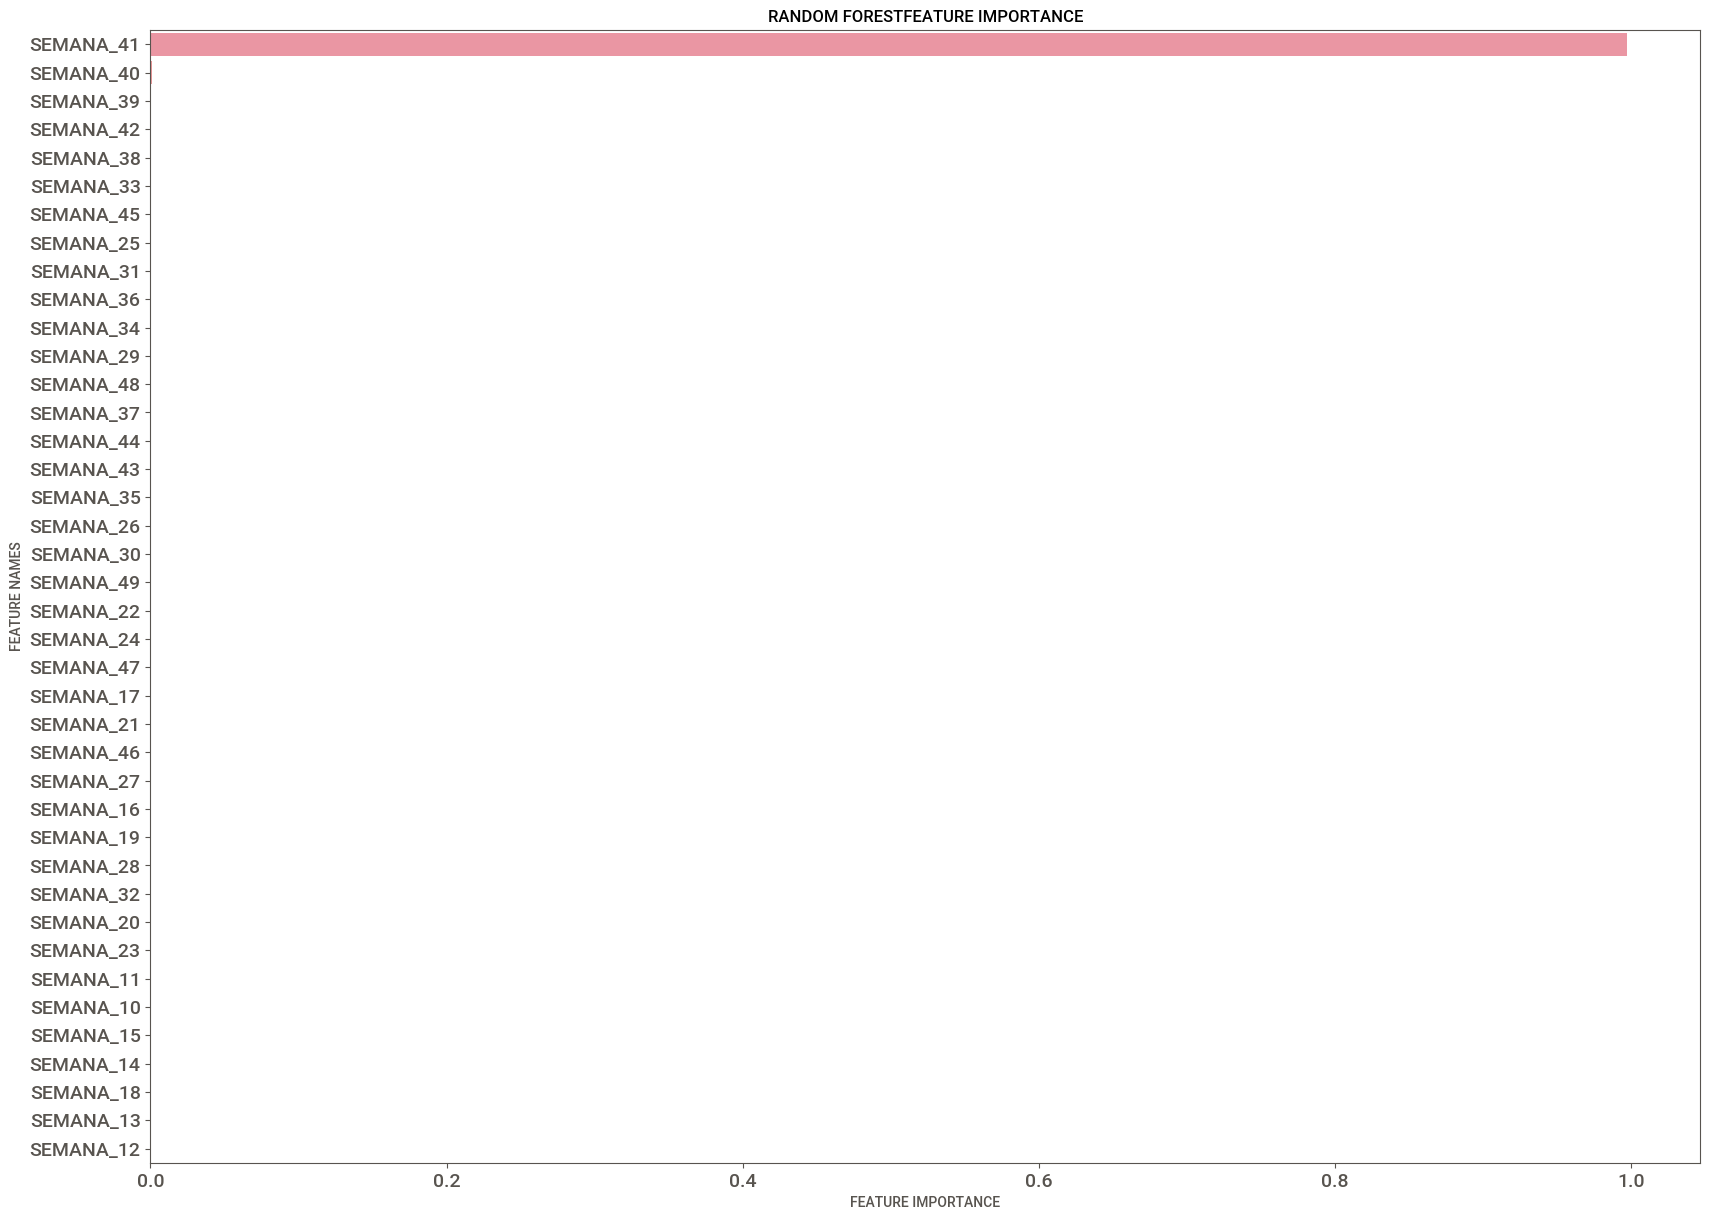

In [144]:
plot_feature_importance(rf_quant.feature_importances_,col_features_1,'RANDOM FOREST')

In [145]:
# %% METRICAS

pred_train = np.exp(rf_quant.predict(X_train))
pred_test = np.exp(rf_quant.predict(X_test))

mape_train = metrics.mean_absolute_percentage_error(y_train, pred_train)*100
mape_test = metrics.mean_absolute_percentage_error(y_test, pred_test)*100
#print('Train Mean Absolute Percentage Error: {}'.format(mape_train))
#print('Test Mean Absolute Percentage Error: {}'.format(mape_test))

# MAPE
#def MAPE(Y_actual,Y_Predicted):
#    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
#    return mape

#mape_train = MAPE(train_labels, pred_train)
#mape_test = MAPE(test_labels, pred_test)

# Adj MAPE
def smape_adjusted(a, f):
    return (1/a.size * np.sum(np.abs(f-a) / (np.abs(a) + np.abs(f))*100))

adj_mape_train = smape_adjusted(y_train, pred_train)
adj_mape_test = smape_adjusted(y_test, pred_test)

#print('Train Simetric Mean Absolute Percentage Error Adjusted: {}'.format(adj_mape_train))
#print('Test Simectric Mean Absolute Percentage Error Adjusted: {}'.format(adj_mape_test))

# RMSE
rmse_train = metrics.mean_squared_error(y_train,pred_train , squared=False)
rmse_test = metrics.mean_squared_error(y_test,pred_test , squared=False)

#print('Train RMSE: {}'.format(rmse_train))
#print('Test RMSE: {}'.format(rmse_test))

metricas_values = {'train': [mape_train, adj_mape_train, rmse_train], 'test':[mape_test, adj_mape_test, rmse_test]}
metricas = pd.DataFrame(index=['MAPE', 'Adj MAPE', 'RMSE'], data=metricas_values)

metricas

FloatingPointError: overflow encountered in square